## ISMT S-136 Time Series Analysis with Python, Summer 2021   
### Section 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt

from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.stattools import acf

## 1. Theoretical Properties of an AR(1) Process

### Theoretical ACF of AR(1) with $\phi = 0.9$

In [1]:
# AR(1) with phi = 0.9

phi = np.array([0.9])
theta = np.array([0.])

ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

NameError: name 'np' is not defined

Theoretical rho(h) of AR(1) with phi=+0.9:
 [1.         0.9        0.81       0.729      0.6561     0.59049
 0.531441   0.4782969  0.43046721 0.38742049 0.34867844 0.3138106
 0.28242954 0.25418658 0.22876792 0.20589113 0.18530202 0.16677182
 0.15009464 0.13508517 0.12157665 0.10941899 0.09847709 0.08862938
 0.07976644 0.0717898  0.06461082 0.05814974 0.05233476 0.04710129
 0.04239116 0.03815204 0.03433684 0.03090315 0.02781284 0.02503156
 0.0225284  0.02027556 0.018248   0.0164232 ]


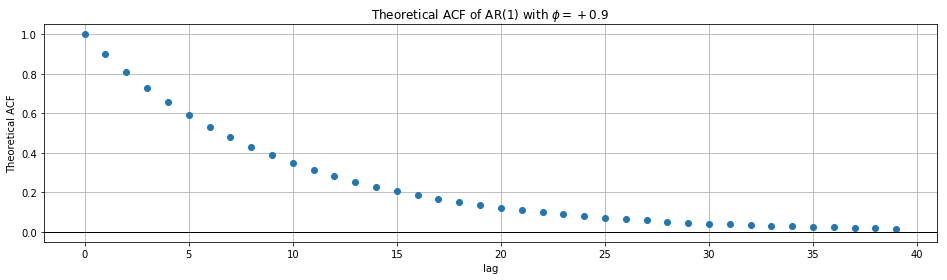

In [3]:
h_max = 40
rho = arma_process.acf(h_max)
print("Theoretical rho(h) of AR(1) with phi=+0.9:\n",rho)

plt.figure(figsize=(16,4))
plt.plot(rho,linestyle='None',marker='o')
plt.ylim(-0.05, 1.05)
plt.axhline(linewidth=1, color='k')
plt.xlabel("lag")
plt.ylabel("Theoretical ACF")
plt.title("Theoretical ACF of AR(1) with $\phi=+0.9$")
plt.grid(True)

### Representation of AR(1), $\phi = 0.9$, as a linear process: 

$x_t=\sum_{j=0}^\infty \underbrace{\phi^j}_{\psi_j} w_{t-j}$

In [4]:
psi = arma_process.arma2ma(lags=h_max)
print("psi:\n",psi)

psi:
 [1.         0.9        0.81       0.729      0.6561     0.59049
 0.531441   0.4782969  0.43046721 0.38742049 0.34867844 0.3138106
 0.28242954 0.25418658 0.22876792 0.20589113 0.18530202 0.16677182
 0.15009464 0.13508517 0.12157665 0.10941899 0.09847709 0.08862938
 0.07976644 0.0717898  0.06461082 0.05814974 0.05233476 0.04710129
 0.04239116 0.03815204 0.03433684 0.03090315 0.02781284 0.02503156
 0.0225284  0.02027556 0.018248   0.0164232 ]


### Causality of AR(1) with $\phi = 0.9$

In [5]:
arma_process.isstationary

True

### Theoretical ACF of AR(1) with $\phi = -0.9$

In [6]:
# AR(1) with phi = -0.9

phi = np.array([-0.9])
theta = np.array([0.])

ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

coefficients of the autoregressive operator: [1.  0.9]
coefficients of the moving average operator: [1. 0.]


Theoretical rho(h) of AR(1) with phi=-0.9:
 [ 1.         -0.9         0.81       -0.729       0.6561     -0.59049
  0.531441   -0.4782969   0.43046721 -0.38742049  0.34867844 -0.3138106
  0.28242954 -0.25418658  0.22876792 -0.20589113  0.18530202 -0.16677182
  0.15009464 -0.13508517  0.12157665 -0.10941899  0.09847709 -0.08862938
  0.07976644 -0.0717898   0.06461082 -0.05814974  0.05233476 -0.04710129
  0.04239116 -0.03815204  0.03433684 -0.03090315  0.02781284 -0.02503156
  0.0225284  -0.02027556  0.018248   -0.0164232 ]


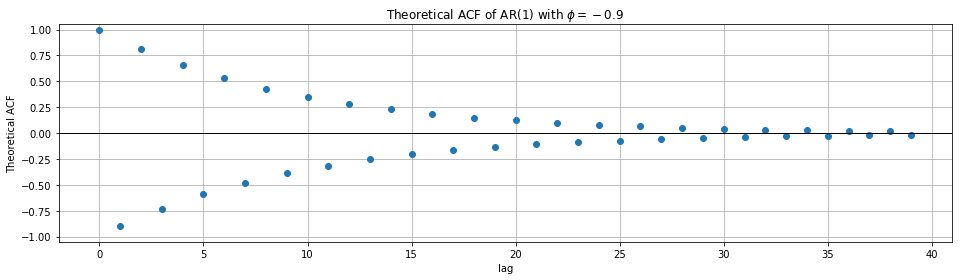

In [7]:
h_max = 40
rho = arma_process.acf(h_max)
print("Theoretical rho(h) of AR(1) with phi=-0.9:\n",rho)

plt.figure(figsize=(16,4))
plt.plot(rho,linestyle='None',marker='o')
plt.ylim(-1.05, 1.05)
plt.axhline(linewidth=1, color='k')
plt.xlabel("lag")
plt.ylabel("Theoretical ACF")
plt.title("Theoretical ACF of AR(1) with $\phi=-0.9$")
plt.grid(True)

### Representation of AR(1), $\phi = -0.9$, as a linear process: 

$x_t=\sum_{j=0}^\infty \underbrace{\phi^j}_{\psi_j} w_{t-j}$

In [8]:
psi = arma_process.arma2ma(lags=h_max)
print("psi:\n",psi)

psi:
 [ 1.         -0.9         0.81       -0.729       0.6561     -0.59049
  0.531441   -0.4782969   0.43046721 -0.38742049  0.34867844 -0.3138106
  0.28242954 -0.25418658  0.22876792 -0.20589113  0.18530202 -0.16677182
  0.15009464 -0.13508517  0.12157665 -0.10941899  0.09847709 -0.08862938
  0.07976644 -0.0717898   0.06461082 -0.05814974  0.05233476 -0.04710129
  0.04239116 -0.03815204  0.03433684 -0.03090315  0.02781284 -0.02503156
  0.0225284  -0.02027556  0.018248   -0.0164232 ]


### Causality of AR(1) with $\phi = -0.9$

In [9]:
arma_process.isstationary

True

## 2. Theoretical Properties of an MA(1) Process

### Theoretical ACF of MA(1) with $\theta = 0.9$

In [10]:
# MA(1) with theta = 0.9

phi = np.array([0])
theta = np.array([0.9])

ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

coefficients of the autoregressive operator: [1 0]
coefficients of the moving average operator: [1.  0.9]


Theoretical rho(h) of MA(1) with theta=0.9:
 [1.         0.49723757 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


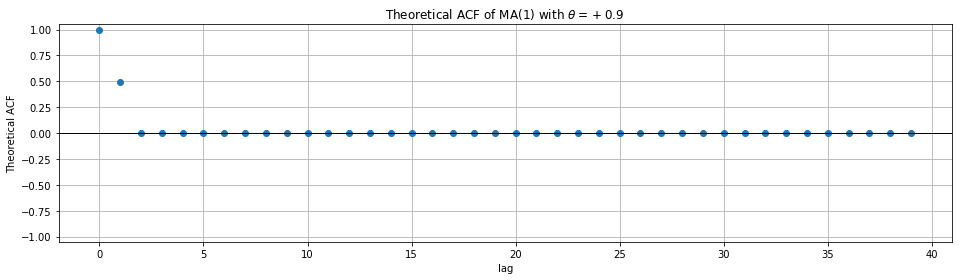

In [11]:
h_max = 40
rho = arma_process.acf(h_max)
print("Theoretical rho(h) of MA(1) with theta=0.9:\n",rho)

plt.figure(figsize=(16,4))
plt.plot(rho,linestyle='None',marker='o')
plt.ylim(-1.05, 1.05)
plt.axhline(linewidth=1, color='k')
plt.xlabel("lag")
plt.ylabel("Theoretical ACF")
plt.title("Theoretical ACF of MA(1) with $\\theta=+0.9$")
plt.grid(True)

### Representation of MA(1), $\theta = 0.9$, as a linear process: 

$x_t=\sum_{j=0}^\infty \psi_j w_{t-j}$

In [12]:
psi = arma_process.arma2ma(lags=h_max)
print("psi:\n",psi)

psi:
 [1.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0. ]


### Representation of MA(1), $\theta = 0.9$, as an infinite AR representation:

$w_t=\sum_{j=0}^\infty \underbrace{(-\theta)^j}_{\pi_j} x_{t-j}$

In [13]:
pi = arma_process.arma2ar(lags=h_max)
print("pi:\n",pi)

pi:
 [ 1.         -0.9         0.81       -0.729       0.6561     -0.59049
  0.531441   -0.4782969   0.43046721 -0.38742049  0.34867844 -0.3138106
  0.28242954 -0.25418658  0.22876792 -0.20589113  0.18530202 -0.16677182
  0.15009464 -0.13508517  0.12157665 -0.10941899  0.09847709 -0.08862938
  0.07976644 -0.0717898   0.06461082 -0.05814974  0.05233476 -0.04710129
  0.04239116 -0.03815204  0.03433684 -0.03090315  0.02781284 -0.02503156
  0.0225284  -0.02027556  0.018248   -0.0164232 ]


### Invertibility of MA(1) with $\theta = 0.9$

In [14]:
arma_process.isinvertible

True

### Theoretical ACF of MA(1) with $\theta = -0.9$

In [15]:
# MA(1) with theta = -0.9

phi = np.array([0])
theta = np.array([-0.9])

ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

coefficients of the autoregressive operator: [1 0]
coefficients of the moving average operator: [ 1.  -0.9]


Theoretical rho(h) of MA(1) with theta=-0.9:
 [ 1.         -0.49723757  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]


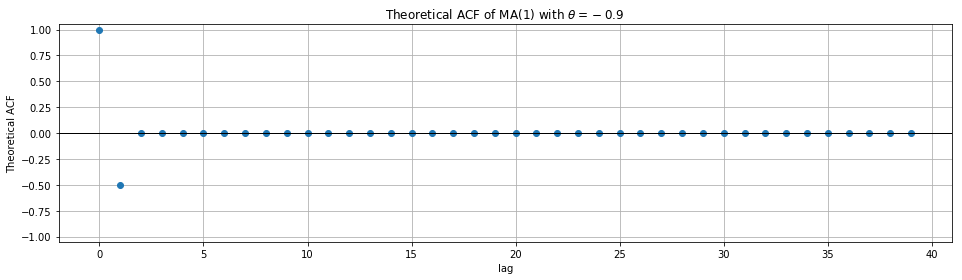

In [16]:
h_max = 40
rho = arma_process.acf(h_max)
print("Theoretical rho(h) of MA(1) with theta=-0.9:\n",rho)

plt.figure(figsize=(16,4))
plt.plot(rho,linestyle='None',marker='o')
plt.ylim(-1.05, 1.05)
plt.axhline(linewidth=1, color='k')
plt.xlabel("lag")
plt.ylabel("Theoretical ACF")
plt.title("Theoretical ACF of MA(1) with $\\theta=-0.9$")
plt.grid(True)

### Representation of MA(1), $\theta = -0.9$, as a linear process: 

$x_t=\sum_{j=0}^\infty \psi_j w_{t-j}$

In [17]:
psi = arma_process.arma2ma(lags=h_max)
print("psi:\n",psi)

psi:
 [ 1.  -0.9  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]


### Representation of MA(1), $\theta = -0.9$, as an infinite AR:

$w_t=\sum_{j=0}^\infty \underbrace{(-\theta)^j}_{\pi_j} x_{t-j}$

In [18]:
pi = arma_process.arma2ar(lags=h_max)
print("psi:\n",pi)

psi:
 [1.         0.9        0.81       0.729      0.6561     0.59049
 0.531441   0.4782969  0.43046721 0.38742049 0.34867844 0.3138106
 0.28242954 0.25418658 0.22876792 0.20589113 0.18530202 0.16677182
 0.15009464 0.13508517 0.12157665 0.10941899 0.09847709 0.08862938
 0.07976644 0.0717898  0.06461082 0.05814974 0.05233476 0.04710129
 0.04239116 0.03815204 0.03433684 0.03090315 0.02781284 0.02503156
 0.0225284  0.02027556 0.018248   0.0164232 ]


### Invertibility of MA(1) with $\theta = -0.9$

In [19]:
arma_process.isinvertible

True

## 3. Theoretical Properties of an ARMA(2,4) Process

In [20]:
# ARMA(2,4)

phi = np.array([0.2, -0.3])
theta = np.array([0.1, -0.6, 0.2, 0.7 ])


ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1
print("coefficients of the autoregressive operator:", ar)
print("coefficients of the moving average operator:", ma)

arma_process = smt.ArmaProcess(ar, ma)

coefficients of the autoregressive operator: [ 1.  -0.2  0.3]
coefficients of the moving average operator: [ 1.   0.1 -0.6  0.2  0.7]


Theoretical rho(h) of MA(1) with theta=0.9:
 [ 1.00000000e+00  7.45702449e-02 -6.87893272e-01 -1.35392654e-02
  4.53629211e-01  9.47876218e-02 -1.17131239e-01 -5.18625343e-02
  2.47668648e-02  2.05121333e-02 -3.32763279e-03 -6.81916654e-03
 -3.65543470e-04  1.97264127e-03  5.04191294e-04 -4.90954121e-04
 -2.49448213e-04  9.73965939e-05  9.43137825e-05 -1.03562216e-05
 -3.03653791e-05 -2.96620932e-06  8.51637186e-06  2.59313717e-06
 -2.03628412e-06 -1.18519798e-06  3.73845642e-07  4.30328521e-07
 -2.60879884e-08 -1.34316154e-07 -1.90368343e-08  3.64874794e-08
  1.30085462e-08 -8.34453458e-09 -5.57147076e-09  1.38906622e-09
  1.94925447e-09 -2.68689717e-11 -5.90150136e-10 -1.09969336e-10]


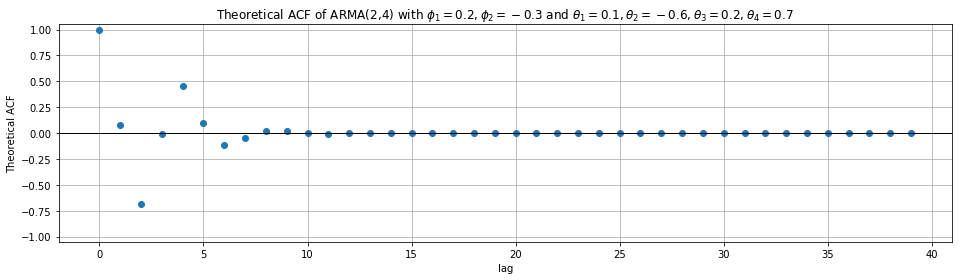

In [21]:
h_max = 40
rho = arma_process.acf(h_max)
print("Theoretical rho(h) of MA(1) with theta=0.9:\n",rho)

plt.figure(figsize=(16,4))
plt.plot(rho,linestyle='None',marker='o')
plt.ylim(-1.05, 1.05)
plt.axhline(linewidth=1, color='k')
plt.xlabel("lag")
plt.ylabel("Theoretical ACF")
plt.title("Theoretical ACF of ARMA(2,4) with $\phi_1=0.2,\phi_2=-0.3$ and $\\theta_1=0.1,\\theta_2=-0.6, \\theta_3=0.2, \\theta_4=0.7$")
plt.grid(True)

In [22]:
arma_process.isstationary

True

In [23]:
arma_process.isinvertible

True

In [24]:
pi = arma_process.arma2ar(lags=h_max)
print("psi coefficients of AR representation:\n",pi)

psi coefficients of AR representation:
 [ 1.         -0.3         0.93       -0.473      -0.0347     -0.25633
 -0.551587    0.2394007  -0.27933627  0.46132245  0.12449675  0.15263056
  0.1627059  -0.27251732  0.00720143 -0.3036131  -0.02470849  0.00962482
  0.03989404  0.21925636  0.01738177  0.11509946 -0.07285798 -0.08061034
 -0.07084089 -0.10728013  0.03534614  0.00269272  0.09198306  0.06044419
  0.02386458  0.01359854 -0.06351809 -0.03257291 -0.05427847 -0.01093126
  0.01950329  0.02514765  0.04936839  0.01390298]


In [25]:
psi = arma_process.arma2ma(lags=h_max)
print("psi coefficients of MA representation:\n",psi)

psi coefficients of MA representation:
 [ 1.00000000e+00  3.00000000e-01 -8.40000000e-01 -5.80000000e-02
  9.40400000e-01  2.05480000e-01 -2.41024000e-01 -1.09848800e-01
  5.03374400e-02  4.30221280e-02 -6.49680640e-03 -1.42059997e-02
 -8.92158016e-04  4.08336830e-03  1.08432106e-03 -1.00814628e-03
 -5.26925575e-04  1.97058768e-04  1.97489426e-04 -1.96197452e-05
 -6.31707769e-05 -6.74823181e-06  1.76015867e-05  5.54478688e-06
 -4.17151863e-06 -2.49773979e-06  7.51907632e-07  8.99703464e-07
 -4.56315968e-08 -2.79037359e-07 -4.21179927e-08  7.52876090e-08
  2.76929196e-08 -1.70476988e-08 -1.17174156e-08  2.77082651e-09
  4.06938999e-09 -1.73699539e-11 -1.22429099e-09 -2.39647212e-10]


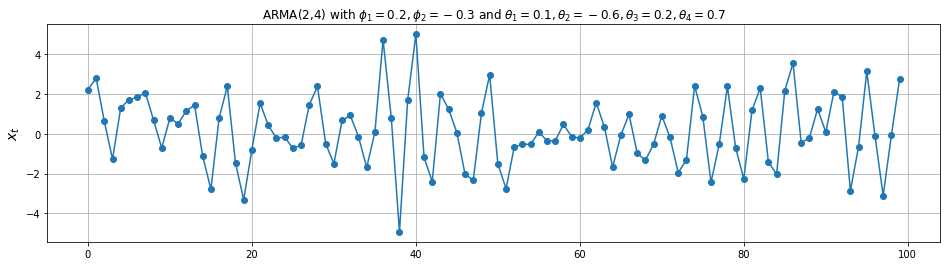

In [26]:
np.random.seed(123456789)
n = int(100)

xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n) 

plt.figure(figsize=(16,4))
plt.plot(xt,marker='o')
plt.ylabel("$x_t$",fontsize=14)
plt.title("ARMA(2,4) with $\phi_1=0.2,\phi_2=-0.3$ and $\\theta_1=0.1,\\theta_2=-0.6, \\theta_3=0.2, \\theta_4=0.7$")
plt.grid(True)

Text(0.5, 1.0, 'ACF of ARMA(2,4)')

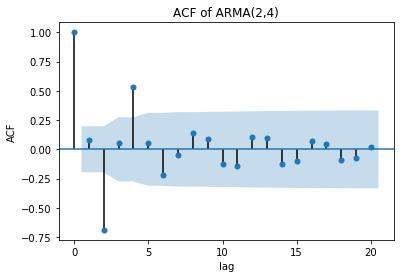

In [27]:
fig = plot_acf(xt,lags = 20)
plt.xlabel("lag")
plt.ylabel("ACF")
plt.title("ACF of ARMA(2,4)")